## CMPINF 2100 Week 11
### Making predictions with linear models
We will make predictions for the NON LINEAR trend to input relationship!!!

Thus, we are making predictions when a NON-LINEAR FEATURE is derived from the INPUT!!
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

## Read data

In [3]:
df = pd.read_csv("week_11_nonlinear_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               15 non-null     float64
 1   trend           15 non-null     float64
 2   y               15 non-null     float64
 3   true_intercept  15 non-null     float64
 4   true_slope      15 non-null     float64
 5   true_sigma      15 non-null     float64
dtypes: float64(6)
memory usage: 848.0 bytes


## Fitting the linear model
The model includes a NON-LINEAR FEATURE derived from the INPUT. The smf.ols() formula APPLIES the NON-LINEAR function directly in the formula.

In [5]:
lm_fit = smf.ols(formula="y ~ np.sin(x)", data=df).fit()

In [6]:
lm_fit.params

Intercept    0.098301
np.sin(x)   -2.216698
dtype: float64

In [7]:
lm_fit.bse

Intercept    0.076712
np.sin(x)    0.109770
dtype: float64

In [9]:
lm_fit.conf_int()

,0,1
Intercept,-0.067425,0.264027
np.sin(x),-2.453842,-1.979555


In [10]:
lm_fit.pvalues

Intercept    2.224278e-01
np.sin(x)    3.362554e-11
dtype: float64

## Making predictions

Create a dataset just to visualize the predicted behavior of the output GIVEN the input!

The prediction data does not need to be same length as training dataset.

In [13]:
df_viz = pd.DataFrame({"x": np.linspace(df.x.min()-0.1, df.x.max()+0.1, num=101)})

In [15]:
df_viz

,x
0,-3.100
1,-3.038
2,-2.976
3,-2.914
4,-2.852
...,...
96,2.852
97,2.914
98,2.976
99,3.038


In [17]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.000000,0.567520,0.905523,0.25,-2.25,0.33
1,-2.571429,1.464483,0.892371,0.25,-2.25,0.33
2,-2.142857,2.141771,2.112304,0.25,-2.25,0.33
3,-1.714286,2.476877,2.115940,0.25,-2.25,0.33
4,-1.285714,2.409187,2.515115,0.25,-2.25,0.33
5,-0.857143,1.950945,1.586887,0.25,-2.25,0.33
6,-0.428571,1.185037,0.928959,0.25,-2.25,0.33
7,0.000000,0.250000,0.141207,0.25,-2.25,0.33
8,0.428571,-0.685037,-1.163743,0.25,-2.25,0.33
9,0.857143,-1.450945,-1.098146,0.25,-2.25,0.33


Lets jumpy straight to visualizing the predicted TRENDS (mean output), the CI (the uncertainty on the mean), and the PI (the uncertainty on a single measurement).

We need the same two step approach.

Step 1: Call .get_prediction() method on the fitted object.

In [18]:
predictions = lm_fit.get_prediction(df_viz)

Step 2: Call the .summary_frame() method on prediction object.

In [19]:
lm_pred_summary = predictions.summary_frame()

In [20]:
lm_pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.190473,0.076848,0.024454,0.356492,-0.472504,0.853450
1,0.327524,0.077547,0.159994,0.495054,-0.335833,0.990881
2,0.463695,0.078817,0.293421,0.633968,-0.200360,1.127750
3,0.598461,0.080611,0.424311,0.772611,-0.066598,1.263521
4,0.731305,0.082869,0.552278,0.910333,0.064952,1.397659
...,...,...,...,...,...,...
96,-0.534704,0.082869,-0.713731,-0.355676,-1.201057,0.131650
97,-0.401859,0.080611,-0.576009,-0.227709,-1.066919,0.263200
98,-0.267093,0.078817,-0.437366,-0.096819,-0.931148,0.396962
99,-0.130922,0.077547,-0.298453,0.036608,-0.794279,0.532435


Visualize the predictive mean (trend), the CI, and the PI on a single graphic.

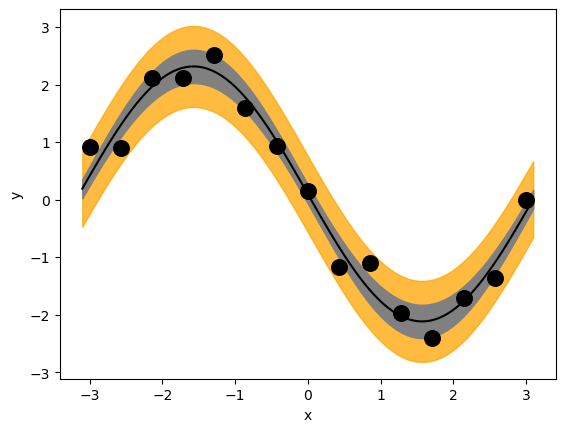

In [36]:
fig, ax = plt.subplots()

## prediction interval
ax.fill_between(df_viz.x,
                lm_pred_summary.obs_ci_lower,
                lm_pred_summary.obs_ci_upper,
                color="orange", edgecolor="orange", alpha=0.75)

## confidence interval
ax.fill_between(df_viz.x,
                lm_pred_summary.mean_ci_lower,
                lm_pred_summary.mean_ci_upper,
                color="grey", edgecolor="grey")

## trend
ax.plot(df_viz.x,
        lm_pred_summary["mean"], color="k", linewidth=1.5)

# include training data
ax.scatter(df.x, df.y, s=125, color="k")

# set labels
ax.set_xlabel("x")
ax.set_ylabel("y")

## show the plot
plt.show()